# Project 1: Write a Data Science Blog Post

### By Diego Zuniga

> In this project we will analyze the Boston AirBnB Database in order to drive some questions related to the bussines. Finally we will write a blog post to cominucate the main findings.

In [104]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [58]:
# reading the database from csv files

calendar = pd.read_csv('boston-airbnb-open-data/calendar.csv')
listings = pd.read_csv('boston-airbnb-open-data/listings.csv')
reviews = pd.read_csv('boston-airbnb-open-data/reviews.csv')

Now let's explore the dataset to propose some questions of interest.

In [59]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [101]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [61]:
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...


Looking at the calendar, we can calculate the occupancy rate and compare this value with some columns from the listing table and see if there are some interesting relationships.
For this purpose let's check the following questions:

- Is the geographic locations relevant to estimate the occupancy rate?
- Is it true that a lower price implies a higher occupancy rate?
- Are the places with higher score values those with higher occupancy rate too?

In order to answer our questions, we will filter the data and select the columns that can be useful for our purposes.

In [62]:
listings_filtered = listings[['id', 'latitude', 'longitude', 'price', 'review_scores_value']]

In [63]:
listings_filtered.head()

,id,latitude,longitude,price,review_scores_value
0,12147973,42.282619,-71.133068,$250.00,NaN
1,3075044,42.286241,-71.134374,$65.00,9.0
2,6976,42.292438,-71.135765,$65.00,10.0
3,1436513,42.281106,-71.121021,$75.00,10.0
4,7651065,42.284512,-71.136258,$79.00,10.0


### Calculating occupancy rate

In order to answer the proposed questions, let's calculate the occupancy rate for every place.
First of all, it is necessary to convert the column available from the table calendar into a boolean.

In [66]:
calendar['available'] = calendar['available'].map({'f': False, 't': True})

In [74]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


Now grouping by listing_id we can calculate the occupancy rate for every listing.

In [79]:
occupancy_rate = calendar.groupby('listing_id').available.mean()

In [92]:
joined = listings_filtered.join(occupancy_rate, on='id')

In [95]:
joined['occupancy_rate'] = 1 - joined['available']

In [100]:
joined.head()

,id,latitude,longitude,price,review_scores_value,available,occupancy_rate
0,12147973,42.282619,-71.133068,$250.00,NaN,0.000000,1.000000
1,3075044,42.286241,-71.134374,$65.00,9.0,0.983562,0.016438
2,6976,42.292438,-71.135765,$65.00,10.0,0.873973,0.126027
3,1436513,42.281106,-71.121021,$75.00,10.0,0.268493,0.731507
4,7651065,42.284512,-71.136258,$79.00,10.0,0.915068,0.084932


### Question 1

In order to see if the geographic location of a listing affects the occupancy_rate let's consider 4 ranges of occupancy in order to plot them on the map. Then we could see if there different ranges are more concentrated into some zone of the city.

In [166]:
crs = {'init': 'epsg:4326'}

In [167]:
street_map = gpd.read_file('bos_land.shp')

In [168]:
street_map = street_map.to_crs(crs)

In [169]:
geometry = [Point(xy) for xy in zip(joined['longitude'], joined['latitude'])]

In [170]:
geo_df = gpd.GeoDataFrame(joined, crs=crs, geometry = geometry)

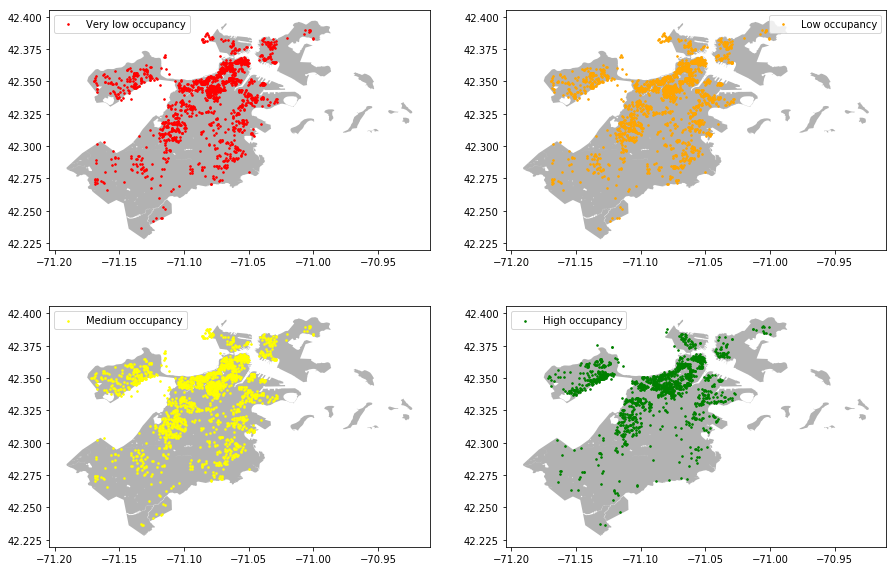

In [221]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
street_map.plot(ax=ax[0,0], alpha=0.6, color='gray')
street_map.plot(ax=ax[0,1], alpha=0.6, color='gray')
street_map.plot(ax=ax[1,0], alpha=0.6, color='gray')
street_map.plot(ax=ax[1,1], alpha=0.6, color='gray')
geo_df[geo_df['occupancy_rate'] <= 0.25].plot(ax=ax[0,0], markersize=10, color='red', marker='.', alpha=1, label = "Very low occupancy")
geo_df[geo_df['occupancy_rate'] <= 0.5].plot(ax=ax[0,1], markersize=10, color='orange', marker='.', alpha=1, label = "Low occupancy")
geo_df[geo_df['occupancy_rate'] <= 0.75].plot(ax=ax[1,0], markersize=10, color='yellow', marker='.', alpha=1, label = "Medium occupancy")
geo_df[geo_df['occupancy_rate'] > 0.75].plot(ax=ax[1,1], markersize=10, color='green', marker='.', alpha=1, label = "High occupancy")
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend();

Looking at the graphics we can see that the distribution of the different occupancy ranges are pretty similar wich means that no matter where the place is located in the city it might have any level of occupancy depending on other parameters.
Nevertheless, it is possible to see that the places with the highest occupancy rate are mostly in the north of the city which is also the most centric area.
So, being in the center is not a sufficient condition to have a high occupancy rate but it is a quite necessary one.

### Question 2

Now we want to see if the price and the occupancy rate that we already calculated are somehow related.

In [226]:
joined.price = joined.price.replace('[\$,]', '', regex=True).astype(float)

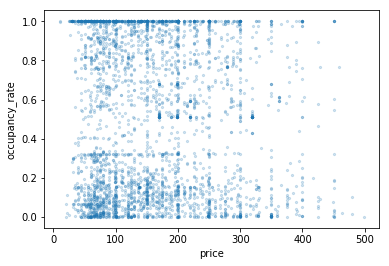

In [260]:
joined[joined['price'] < 500].plot.scatter('price', 'occupancy_rate', alpha=0.2, marker='.');

Leting outside some outlyers we can see that there is no visible tendency in the price and the occupancy rate.

### Question 3

For this question we consider the review_scores_value. Which has many NaN values.
So first, let's see the distribution of the occupancy rate in the rows without score.

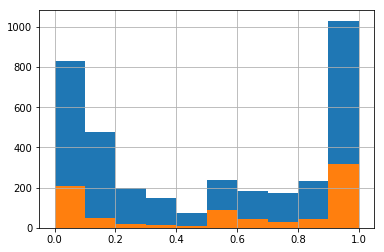

In [246]:
no_rating = joined[joined['review_scores_value'].isna()]
joined.occupancy_rate.hist()
no_rating.occupancy_rate.hist()

It looks like the occupancy_rate in the rows without a value for the review score is very similar to the distribution of the rest of the data.
Then we can ignore the rows with a NaN values knowing that those values are not visibly related to some tendency in the occupancy rate.

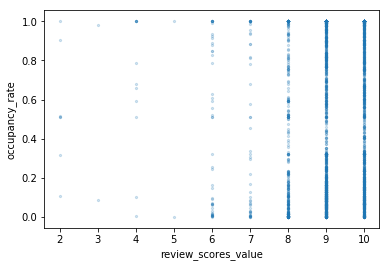

In [248]:
with_rating = joined[joined['review_scores_value'].notna()]
with_rating[with_rating['review_scores_value'] < 500].plot.scatter('review_scores_value', 'occupancy_rate', alpha=0.2, marker='.')

There is no visible tendency in the occupancy rate related to the review scores. So let's se the mean per score.

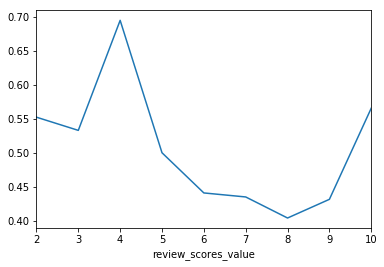

In [259]:
with_rating.groupby('review_scores_value').occupancy_rate.mean().plot();

It is not possible to identify any linear relationship between the two variables, nevertheless we can see that highest values for the occupancy rate mean are either in the low review scores or in the high but for medium values the occupancy rate seems to be very low in average.
This last observation might be due to the high concentration of review scores in higher values where we can see a direct relationship, maybe the non linearity shown in the lowest values is explained because at those levels there are very few data and outlyers are very heavy when calculating the mean.